# Date Functions

In the previous section we created an advanced analysis with _merge_ and _groupby_ and other Pandas capabilities, which are harder to do in Excel. In this section, we will check the more traditional functions that are often used in Excel spreadsheet and we will see how to use them easily in Pandas.

## Date Functions

Let's review some common functions in Excel and their replacement in Pandas

### TODAY

`=TODAY()`

Like many of the Pandas functions, most of the arguments are optional and the default values are often as expected. For example, the time stamp and even the date depends on the timezone needed. In the next example, we will specific the optional tz value to _'America/Chicago'_:

You can see that the data includes columns such as _Seasons_ or _Functioning Day_, however, we might want to calculate such columns differently.

In [1]:
import pandas as pd

In [2]:
now = (
    pd
    .Timestamp
    .today(
        tz='America/Chicago'
    )
)
now

Timestamp('2021-02-14 01:19:39.025639-0600', tz='America/Chicago')

### DAY, MONTH, YEAR

We can apply all the various date functions from excel such as _DAY_, _MINUTE_, _HOUR_ etc.

In [3]:
now.day, now.month, now.year

(14, 2, 2021)

### DATE

we can create a date with given values such as day, month, and year

`=Date(2021,1,1)`

and in pandas:

In [4]:
new_year = (
    pd
    .Timestamp(
        year=2021,
        month=1,
        day=1
    )
)
new_year

Timestamp('2021-01-01 00:00:00')

### NETWORKDAYS

A common function in business context is `=NETWORKDAYS()`, that calculates the number of working days between two dates. In Pandas we can use the following:

In [5]:
import numpy as np 

(
    np
    .busday_count(
        new_year.date(), 
        now.date()
    )
)

31

### WORKDAY

The next useful function is `=WORKDAY(NUMBER)` that can be used when you want to get the date after a given number of working days

In [6]:
new_year = pd.Timestamp("2021-01-01")
new_year.day_name()

'Friday'

In [7]:
workday_100 = new_year + 100 * pd.offsets.BusinessDay()
workday_100

Timestamp('2021-05-21 00:00:00')

The one hundred working day in 2021 is May 21st. 

Pandas has a wide range of options for date offsets, such as weeks, month-end, semi-month-end (15th day), querter, retail year (aka 52-53 week), and many [others](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).

## Real life example

### Loading Data

As usual, let's load a dataset to work on. We will take another dataset that is used in machine learning education, "Bike Share". This is a data set about the demand of bike share service in Seoul. Please note that we need to modify the default encoding of _read_csv_ from 'UTF-8' to 'latin1'.

In [8]:
bike_share_data = (
    pd
    .read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv', 
        encoding='latin1'
    )
)
bike_share_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Date Columns Manipulations

We will start with creating a few columns based on the date column, such as day of the week and month. 
* Start with the table we loaded above
* Make sure that the Date column is in datetime format that we see (note the day before the month)
* Calculate the day-of-week (DOW) of each row (to use the built-in functions we need to access the date accessor (_.dt_))
* Calculate the month value of each row

In [9]:
enriched_bike_share_data = (
    bike_share_data
    .assign(Date = pd.to_datetime(bike_share_data.Date, format='%d/%m/%Y', errors='coerce'))
    .assign(DOW = lambda x : x.Date.dt.day_name())
    .assign(month = lambda x : x.Date.dt.month)
)
enriched_bike_share_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,DOW,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11


### Simple Data Visulizations

* Start with the enriched table above
* Group the data by date column
* Calculate the mean of values per each day
* Plot the results with date as x and number of rented bike as y

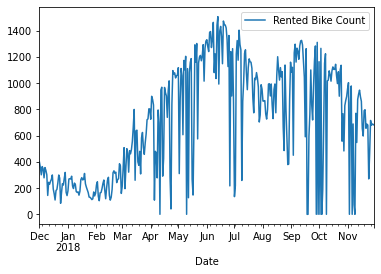

In [10]:
(
    enriched_bike_share_data
    .groupby('Date')
    .mean()
    .plot(y='Rented Bike Count')
);

* Start with the enriched table above
* Group the data by date column
* Calculate the mean of values per each day
* Plot the results 
* with scatter plot with temp as x and number of rented bike as y

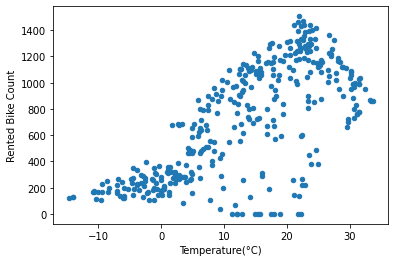

In [11]:
(
    enriched_bike_share_data
    .groupby('Date')
    .mean()
    .plot
    .scatter(x='Temperature(°C)', y='Rented Bike Count')
);

### Analyzing Corrlations between the columns

* Start with the enriched table above
* Group the data by date column
* Calculate the mean of values per each day
* Calculate the correlation values between the numeric values
* Take the values that are related to the first column (_Rented Bike Count_), skip the first two rows (self correlation, and hour column)
* Add style to the output
* Highlight the maximum correlation value with green background
* and Highlight the minimum correlation value with red background

In [12]:
(
    enriched_bike_share_data
    .groupby('Date')
    .mean()
    .corr()
    .iloc[2:,[0]]
    .style
    .highlight_max(color='green')
    .highlight_min(color='red')
)

,Rented Bike Count
Temperature(°C),0.699824
Humidity(%),0.028158
Wind speed (m/s),-0.174859
Visibility (10m),0.145376
Dew point temperature(°C),0.602648
Solar Radiation (MJ/m2),0.684069
Rainfall(mm),-0.214252
Snowfall (cm),-0.240836
month,0.201733


We can see that the higher correlation is with the temperature (the higher the temperature, the more bikes are rented), and with the Snowfall (the more snowfall, the fewer bikes are reneted), which make sense. 